# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [32]:
from commonfunctions import *
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


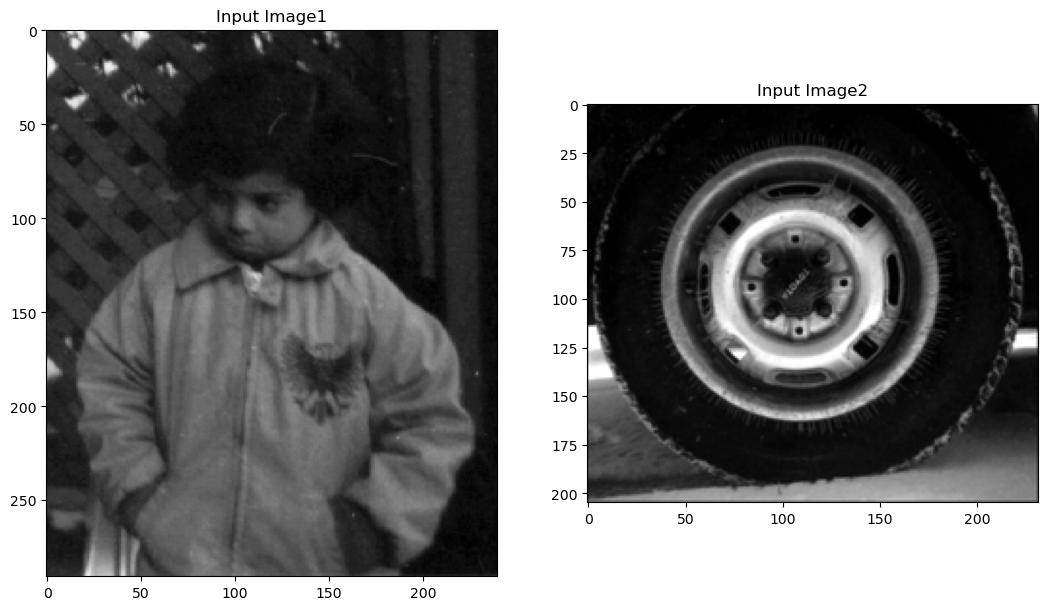

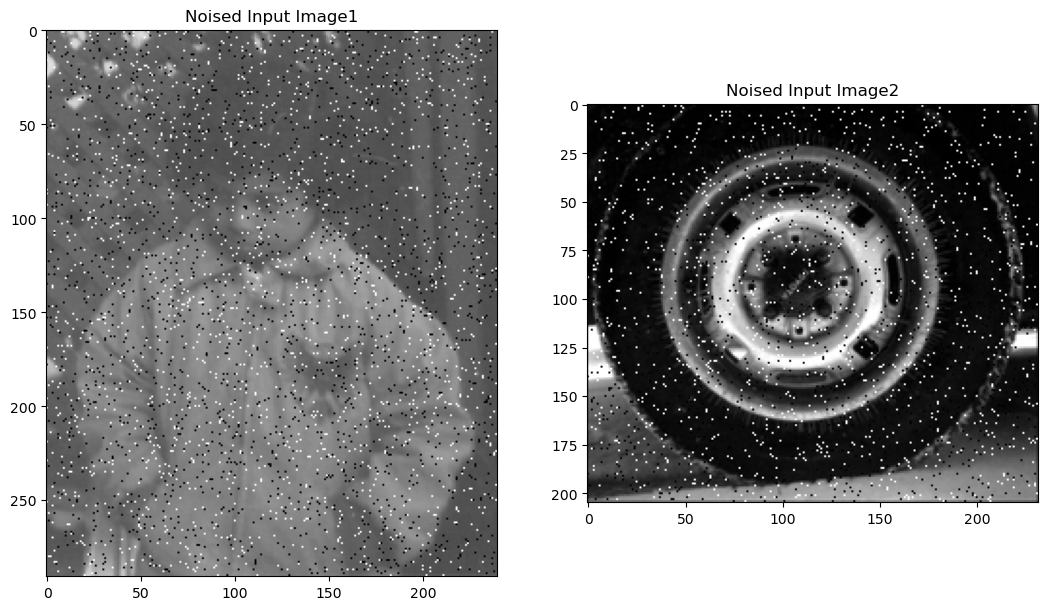

In [10]:
pout = io.imread("pout.tif")
tire = io.imread("tire.tif")
noisy_pout = random_noise(pout,amount=0.05,mode="s&p")
noisy_tire = random_noise(tire,amount=0.05,mode="s&p")
show_images([pout,tire],["Input Image1","Input Image2"])
show_images([noisy_pout,noisy_tire],["Noised Input Image1","Noised Input Image2"])

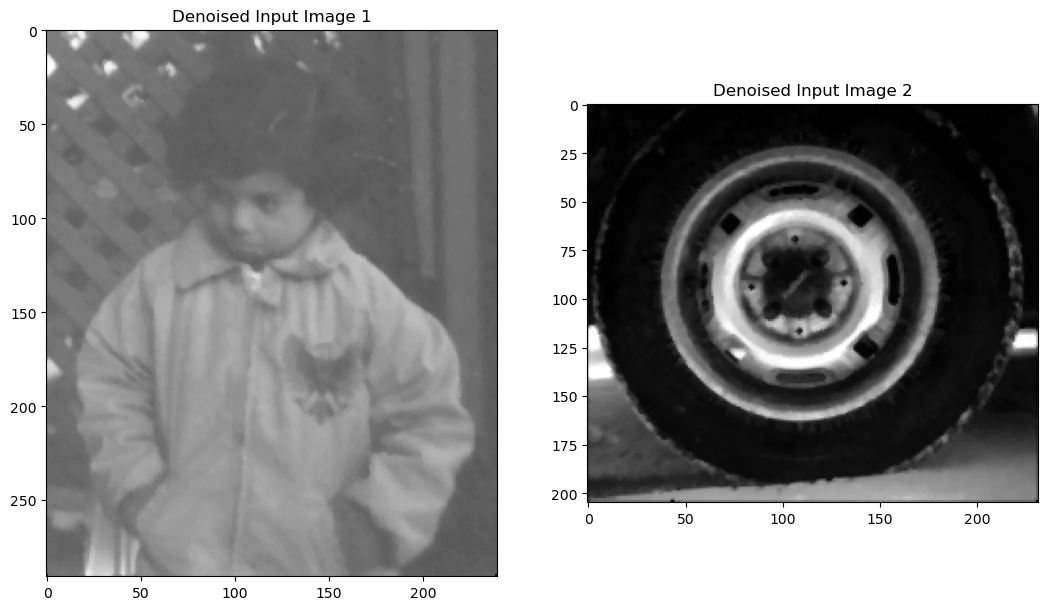

In [30]:
'''
(1) Your own median filter algorithm
'''
def median_filter(noised_img , kernel_size=3):
    half_kernel_size = kernel_size//2
    noised_img = np.pad(noised_img,pad_width=half_kernel_size,mode = 'constant')
    denoised_img = np.zeros_like(noised_img)
    rows,cols = noised_img.shape
    for row in range(half_kernel_size,rows-half_kernel_size):
        for col in range(half_kernel_size,cols-half_kernel_size):
            denoised_img[row,col] = np.median(noised_img[row-half_kernel_size:row+half_kernel_size+1,col-half_kernel_size:col+half_kernel_size+1])
    return denoised_img[half_kernel_size:rows-half_kernel_size,half_kernel_size:cols-half_kernel_size,]
denoised_pout_custom = median_filter(noisy_pout)
denoised_tire_custom = median_filter(noisy_tire)
show_images([denoised_pout_custom,denoised_tire_custom],["Denoised Input Image 1","Denoised Input Image 2"])

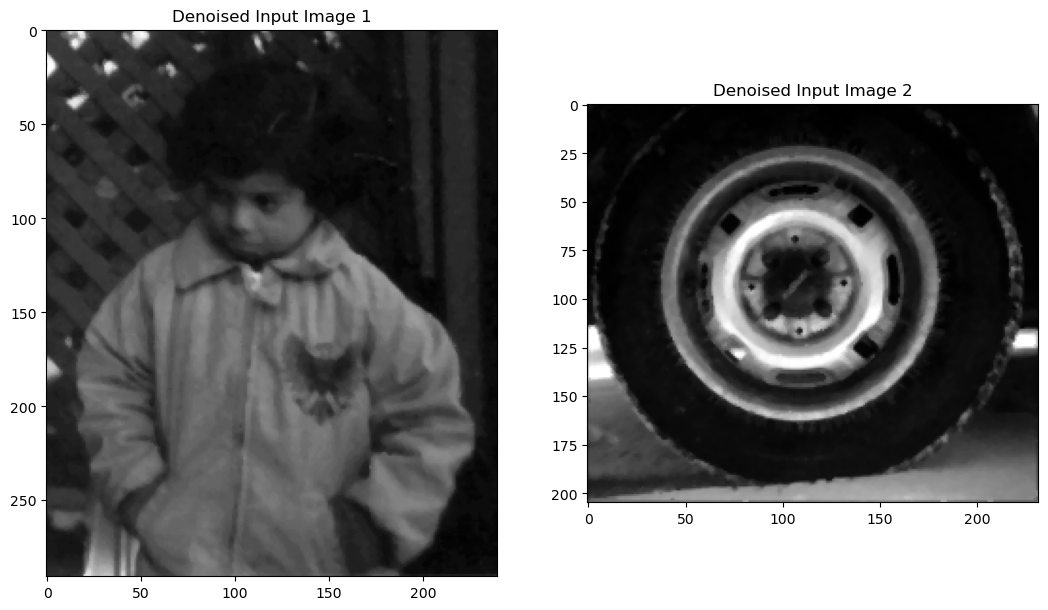

In [31]:
'''
(2) skimage median filter
'''
denoised_pout_sk = median(noisy_pout)
denoised_tire_sk = median(noisy_tire)
show_images([denoised_pout_sk,denoised_tire_sk],["Denoised Input Image 1","Denoised Input Image 2"])

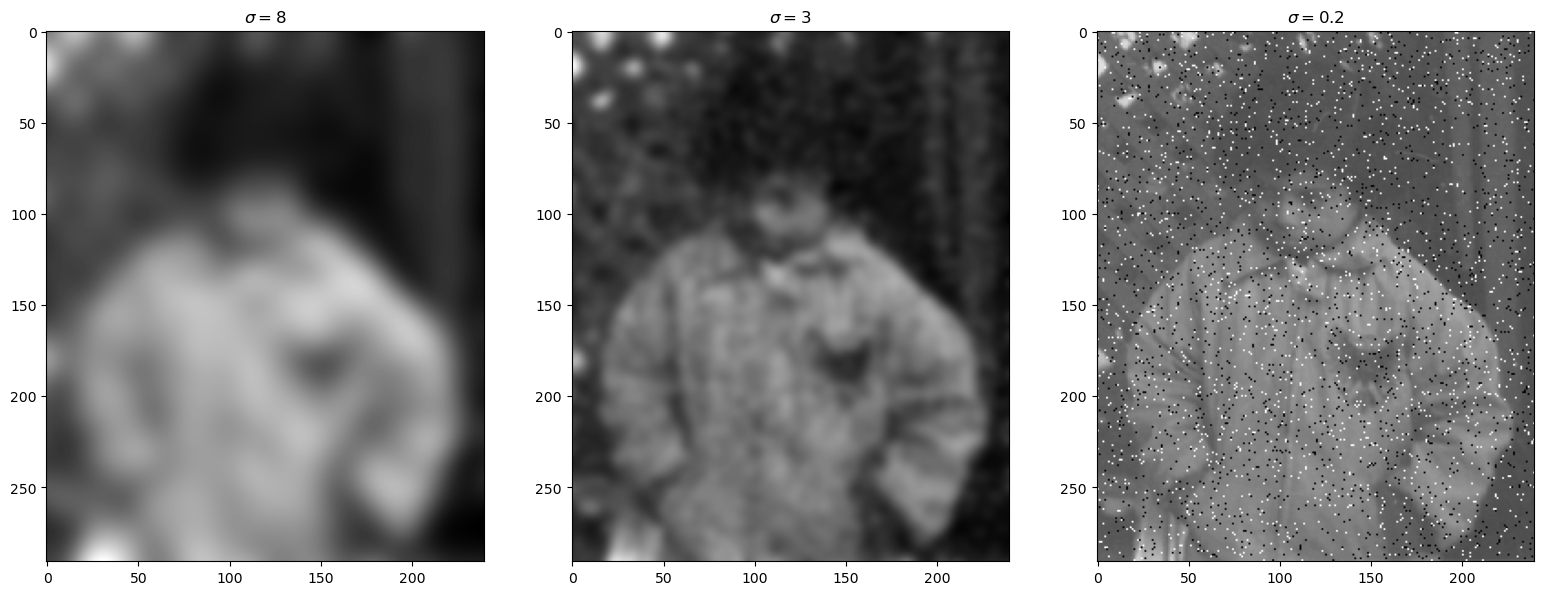

In [39]:
'''
(3) Gaussion Filters
'''
denoised_pout_gauss_8 = gaussian(noisy_pout,sigma=8)
denoised_pout_gauss_3 = gaussian(noisy_pout,sigma=3)
denoised_pout_gauss_02 = gaussian(noisy_pout,sigma=0.2)
show_images([denoised_pout_gauss_8,denoised_pout_gauss_3,denoised_pout_gauss_02],[r"$\sigma = 8$",r"$\sigma = 3$",r"$\sigma = 0.2$"])

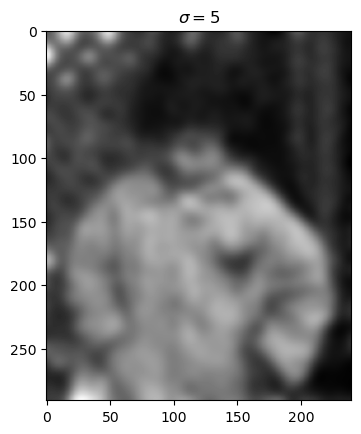

In [48]:
sigma = 5
denoised_pout_gauss_custom = gaussian(noisy_pout,sigma=sigma)
show_images([denoised_pout_gauss_custom],[fr"$\sigma = {sigma}$"])